
# CODE TO PREDICT HOUSE PRICES USING ANNs (REGRESSION TASK)
# Dr. Ryan Ahmed @STEMplicity
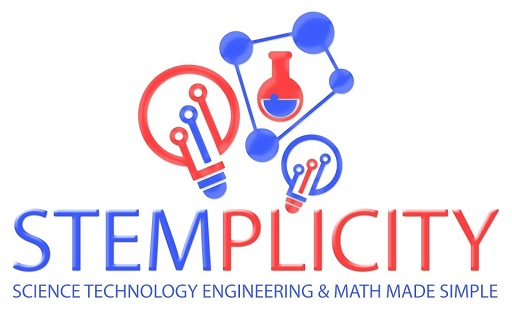



# PROBLEM STATEMENT

- Dataset includes house sale prices for King County in USA. 
- Homes that are sold in the time period: May, 2014 and May, 2015.
- Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction

- Columns:
    - ida: notation for a house
    - date: Date house was sold
    - price: Price is prediction target
    - bedrooms: Number of Bedrooms/House
    - bathrooms: Number of bathrooms/House
    - sqft_living: square footage of the home
    - sqft_lot: square footage of the lot
    - floors: Total floors (levels) in house
    - waterfront: House which has a view to a waterfront
    - view: Has been viewed
    - condition: How good the condition is ( Overall )
    - grade: overall grade given to the housing unit, based on King County grading system
    - sqft_abovesquare: footage of house apart from basement
    - sqft_basement: square footage of the basement
    - yr_built: Built Year
    - yr_renovated: Year when house was renovated
    - zipcode: zip
    - lat: Latitude coordinate
    - long: Longitude coordinate
    - sqft_living15: Living room area in 2015(implies-- some renovations) 
    - sqft_lot15: lotSize area in 2015(implies-- some renovations)

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #1: IMPORT DATASET

In [2]:
house_df = pd.read_csv('kc_house_data.csv', encoding = 'ISO-8859-1')

In [3]:
house_df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [4]:
house_df.head(5)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [5]:
house_df.tail(10)

id             date      price  bedrooms  bathrooms  \
21603  7852140040  20140825T000000   507250.0         3       2.50   
21604  9834201367  20150126T000000   429000.0         3       2.00   
21605  3448900210  20141014T000000   610685.0         4       2.50   
21606  7936000429  20150326T000000  1007500.0         4       3.50   
21607  2997800021  20150219T000000   475000.0         3       2.50   
21608   263000018  20140521T000000   360000.0         3       2.50   
21609  6600060120  20150223T000000   400000.0         4       2.50   
21610  1523300141  20140623T000000   402101.0         2       0.75   
21611   291310100  20150116T000000   400000.0         3       2.50   
21612  1523300157  20141015T000000   325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21603         2270      5536     2.0           0     0  ...      8   
21604         1490      1126     3.0           0     0  ...      8   
21605         2520      6023     2.0           0     0  ...      9   
21606         3510      7200     2.0           0     0  ...      9   
21607         1310      1294     2.0           0     0  ...      8   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21603        2270              0      2003             0    98065  47.5389   
21604        1490              0      2014             0    98144  47.5699   
21605        2520              0      2014             0    98056  47.5137   
21606        2600            910      2009             0    98136  47.5537   
21607        1180            130      2008             0    98116  47.5773   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
21603 -121.881           2270        5731  
21604 -122.288           1400        1230  
21605 -122.167           2520        6023  
21606 -122.398           2050        6200  
21607 -122.409           1330        1265  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[10 rows x 21 columns]

In [6]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
house_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

# STEP #2: VISUALIZE DATASET

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

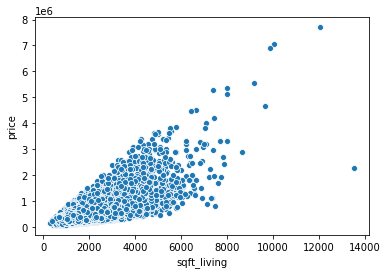

In [8]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = house_df)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

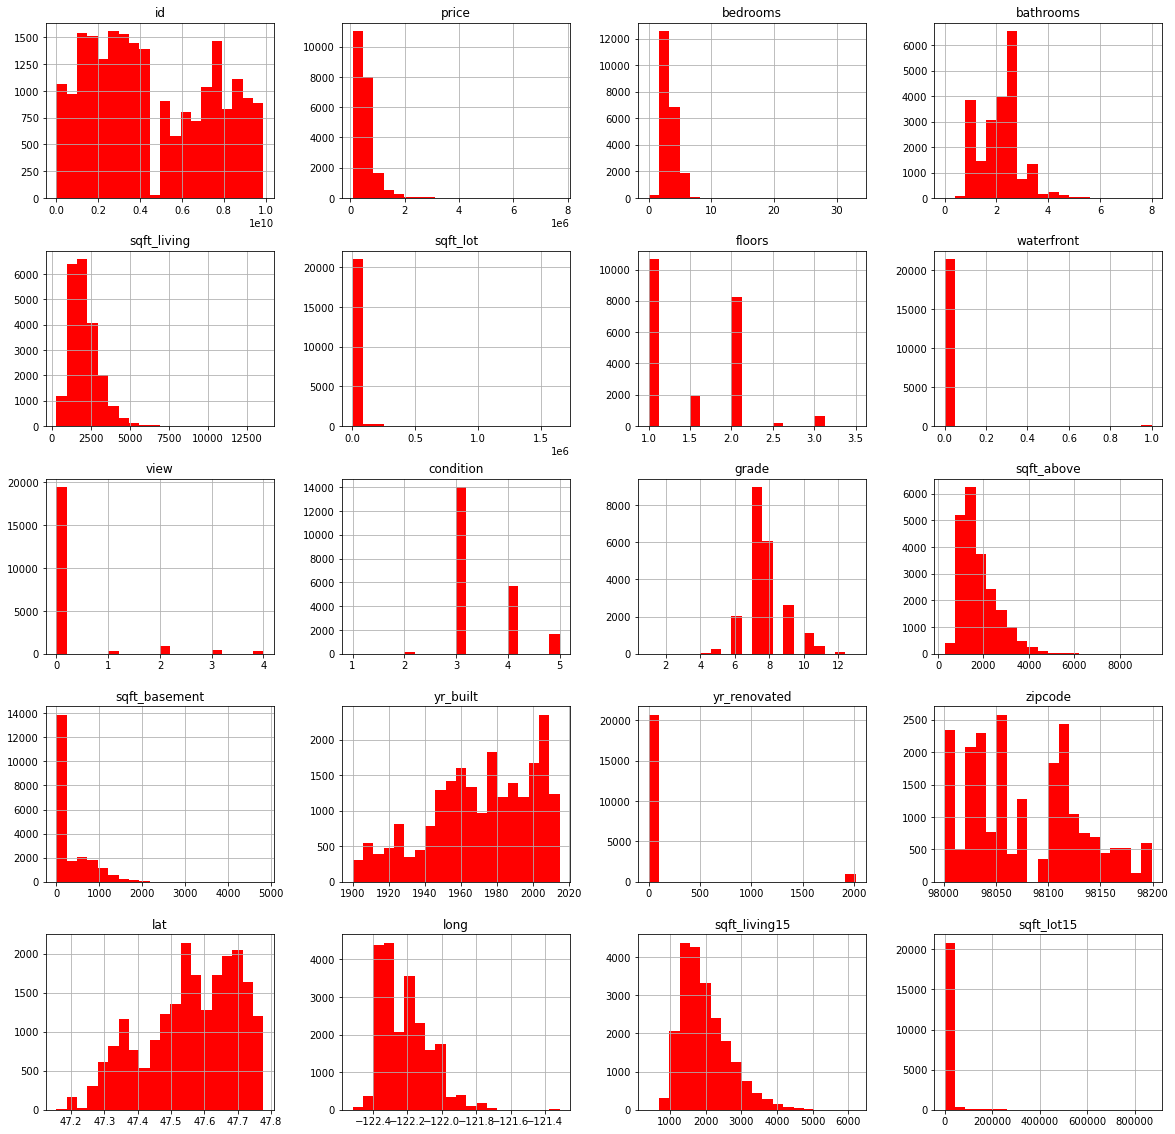

In [11]:
house_df.hist(bins = 20, figsize = (20,20), color = 'r')

<AxesSubplot:>

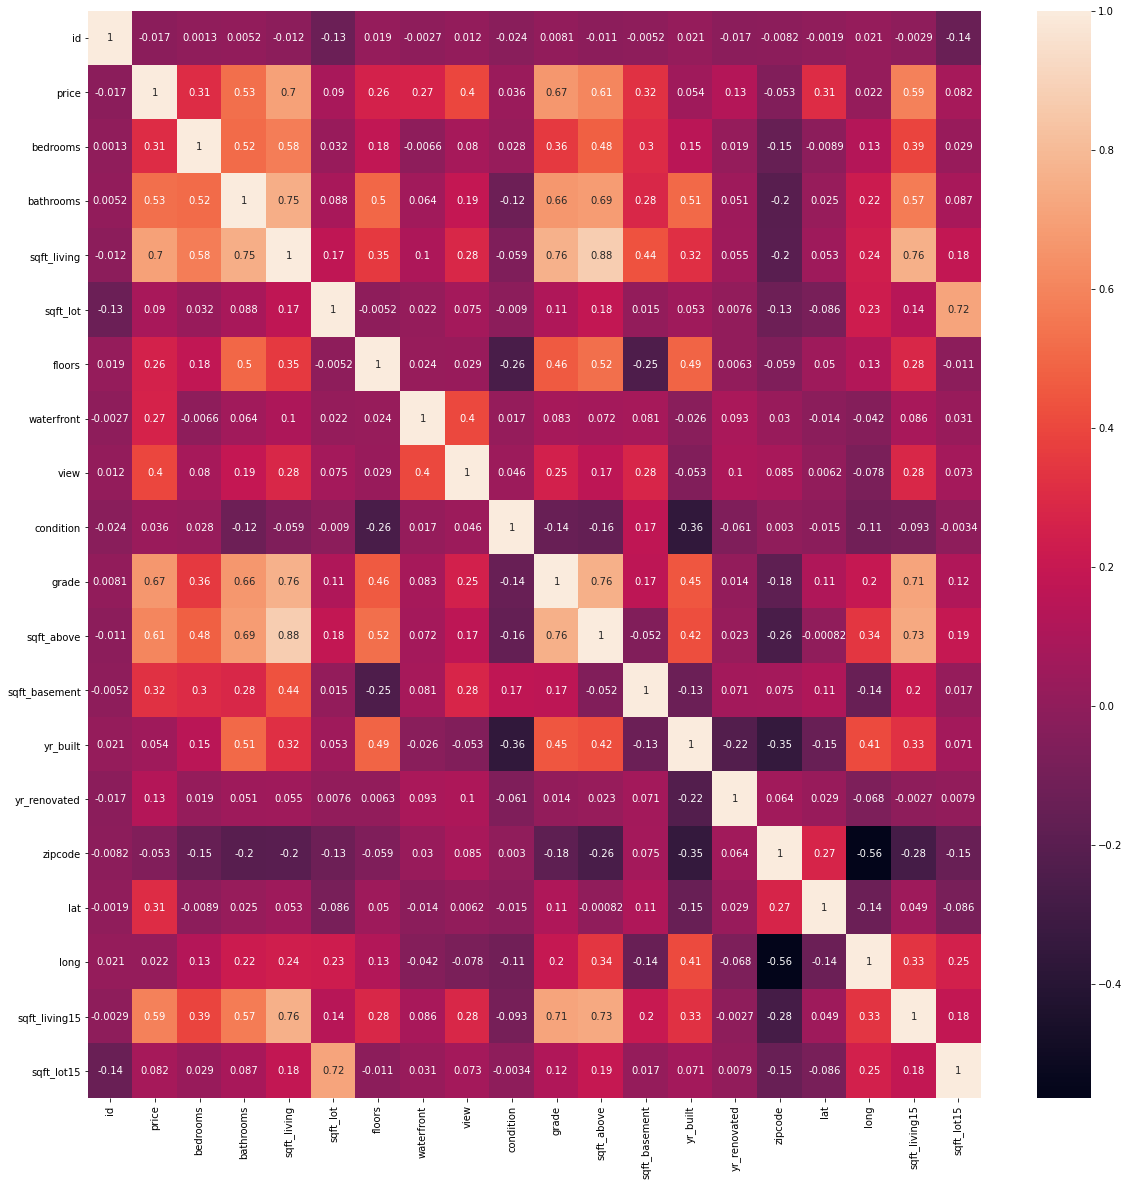

In [12]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house_df.corr(), annot = True)

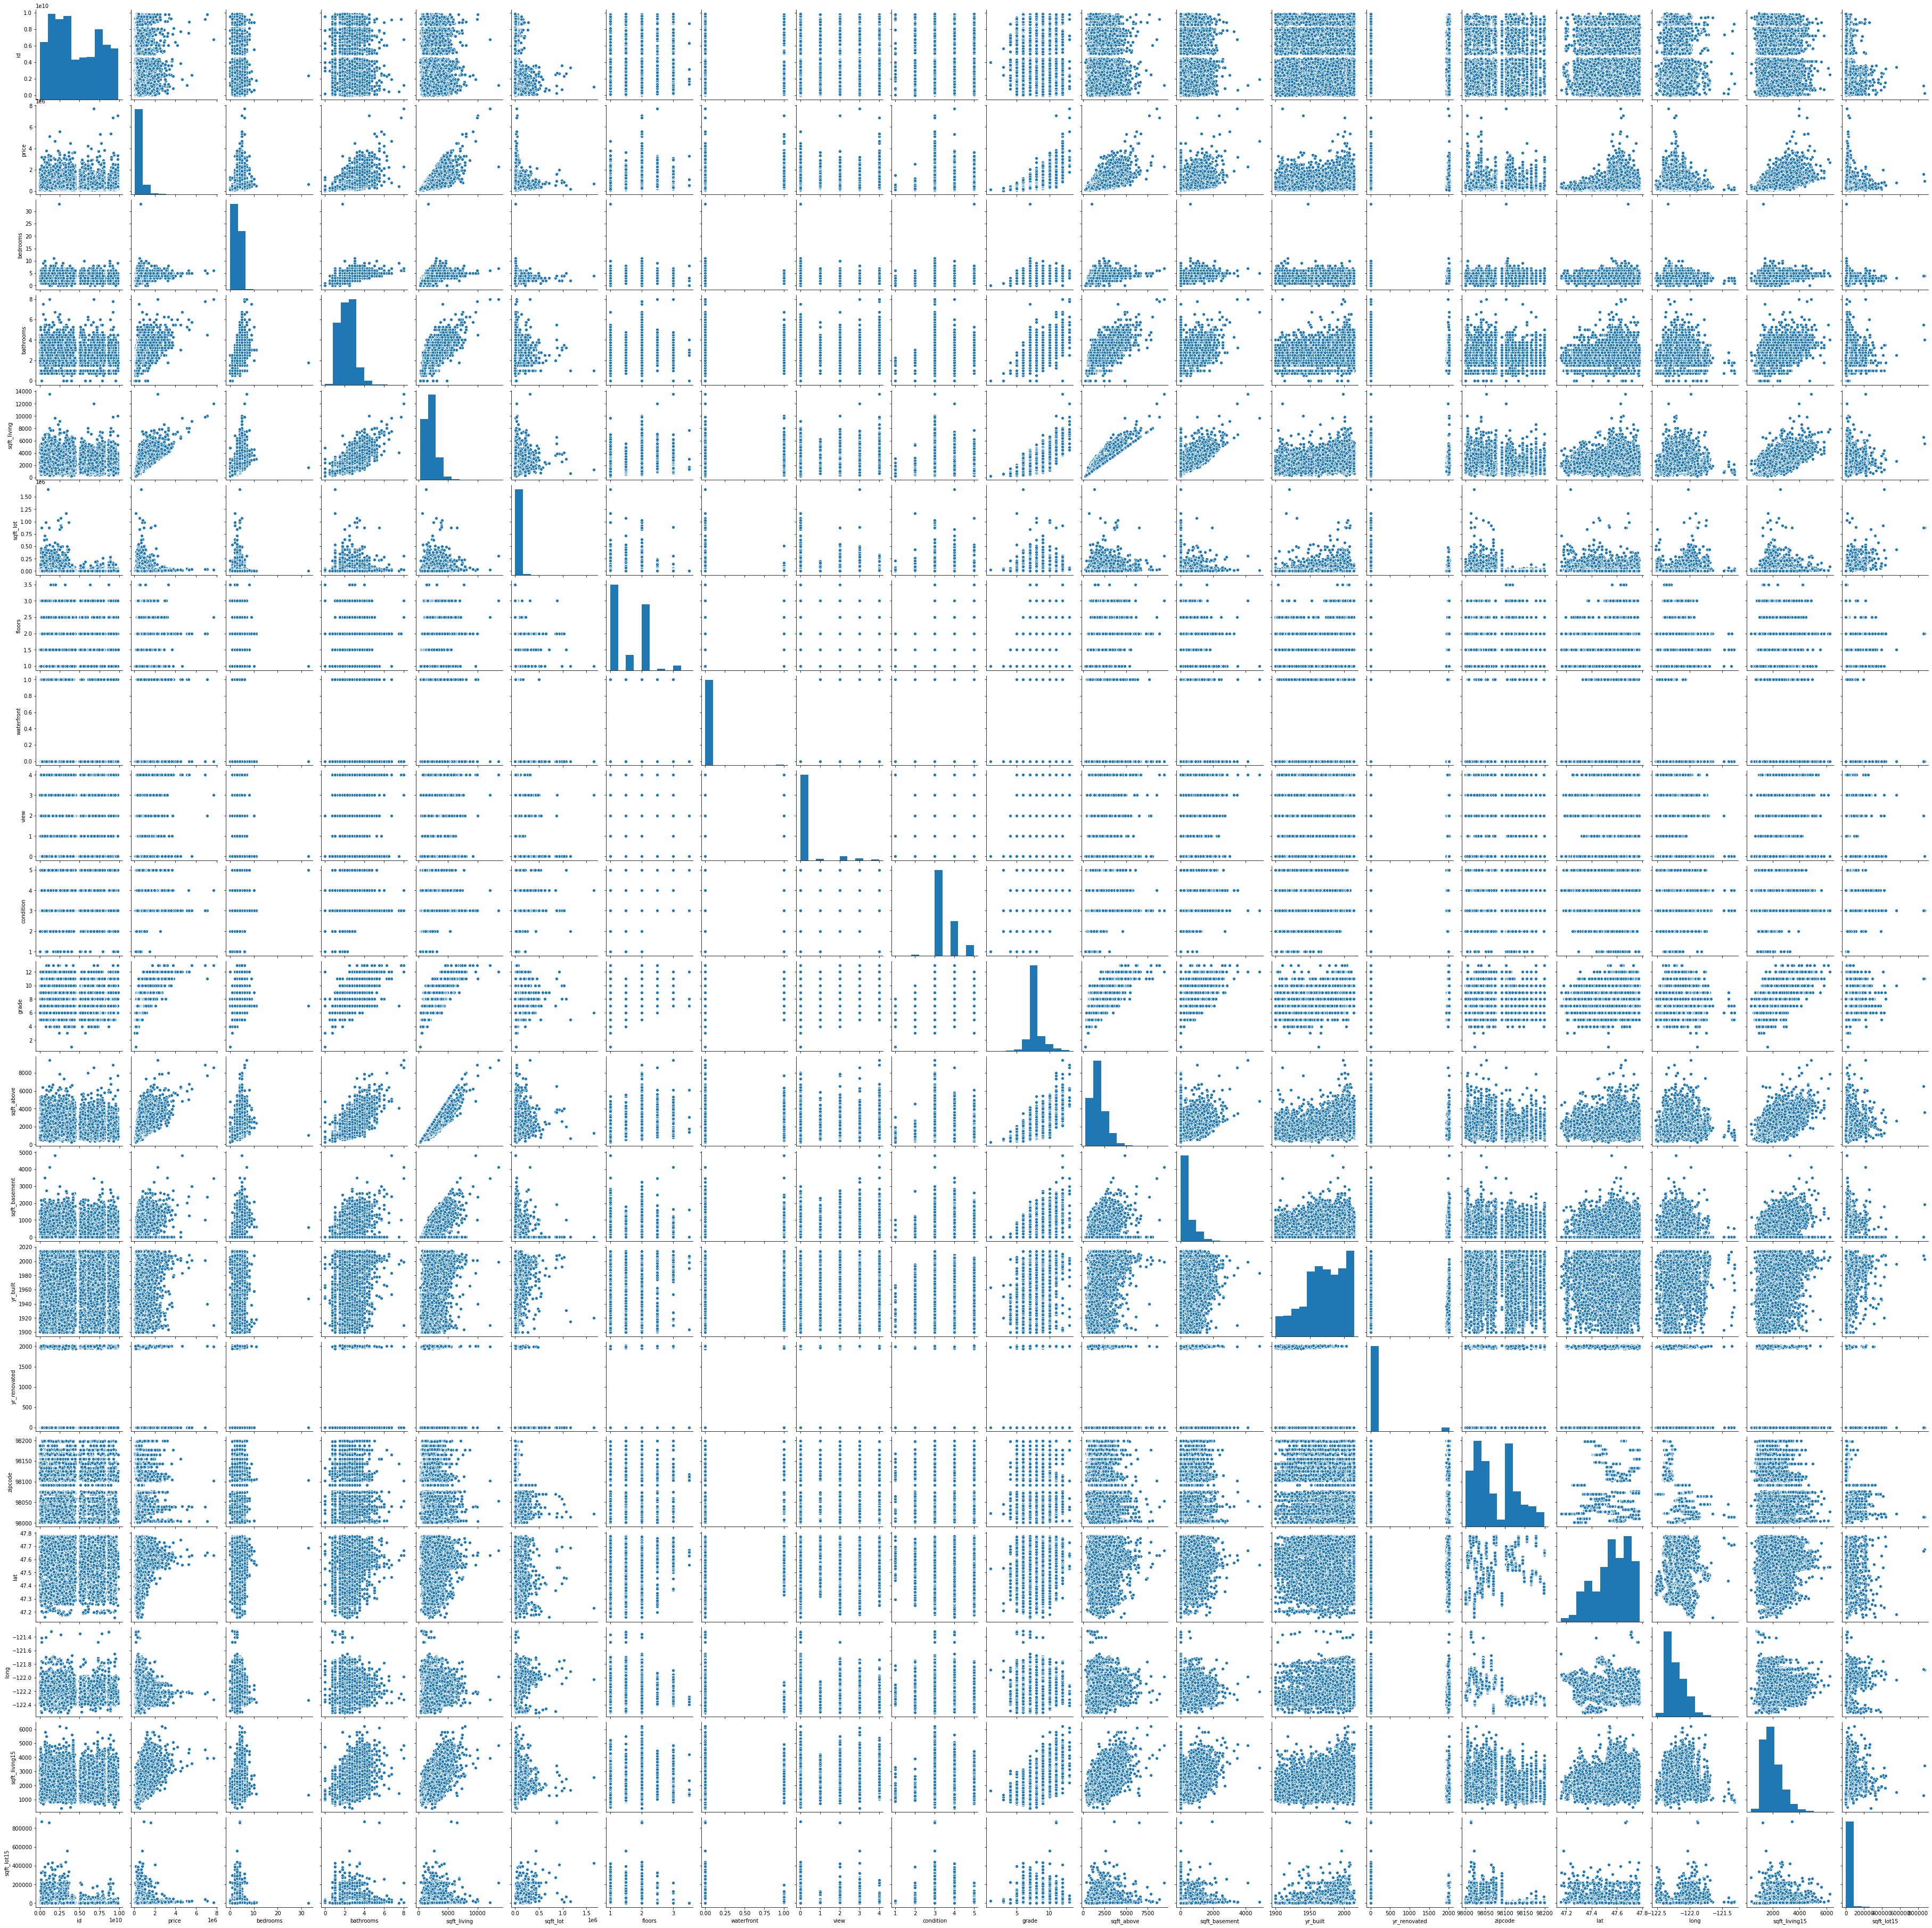

In [13]:
sns.pairplot(house_df)

In [15]:
dataset2 = house_df.drop(columns="price")

<AxesSubplot:title={'center':'Correlation with Response variable'}>

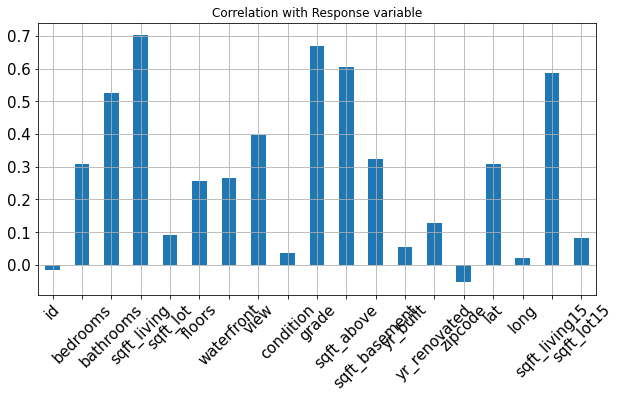

In [17]:
## Correlation with Response Variable

dataset2.corrwith(house_df.price).plot.bar(figsize=(10,5),
                  title = 'Correlation with Response variable',
                  fontsize = 15, rot = 45,
                  grid = True)

In [18]:
house_df_sample = house_df[ ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built'] ]

In [19]:
house_df_sample

price  bedrooms  bathrooms  sqft_living  sqft_lot  sqft_above  \
0      221900.0         3       1.00         1180      5650        1180   
1      538000.0         3       2.25         2570      7242        2170   
2      180000.0         2       1.00          770     10000         770   
3      604000.0         4       3.00         1960      5000        1050   
4      510000.0         3       2.00         1680      8080        1680   
...         ...       ...        ...          ...       ...         ...   
21608  360000.0         3       2.50         1530      1131        1530   
21609  400000.0         4       2.50         2310      5813        2310   
21610  402101.0         2       0.75         1020      1350        1020   
21611  400000.0         3       2.50         1600      2388        1600   
21612  325000.0         2       0.75         1020      1076        1020   

       sqft_basement  yr_built  
0                  0      1955  
1                400      1951  
2                  0      1933  
3                910      1965  
4                  0      1987  
...              ...       ...  
21608              0      2009  
21609              0      2014  
21610              0      2009  
21611              0      2004  
21612              0      2008  

[21613 rows x 8 columns]

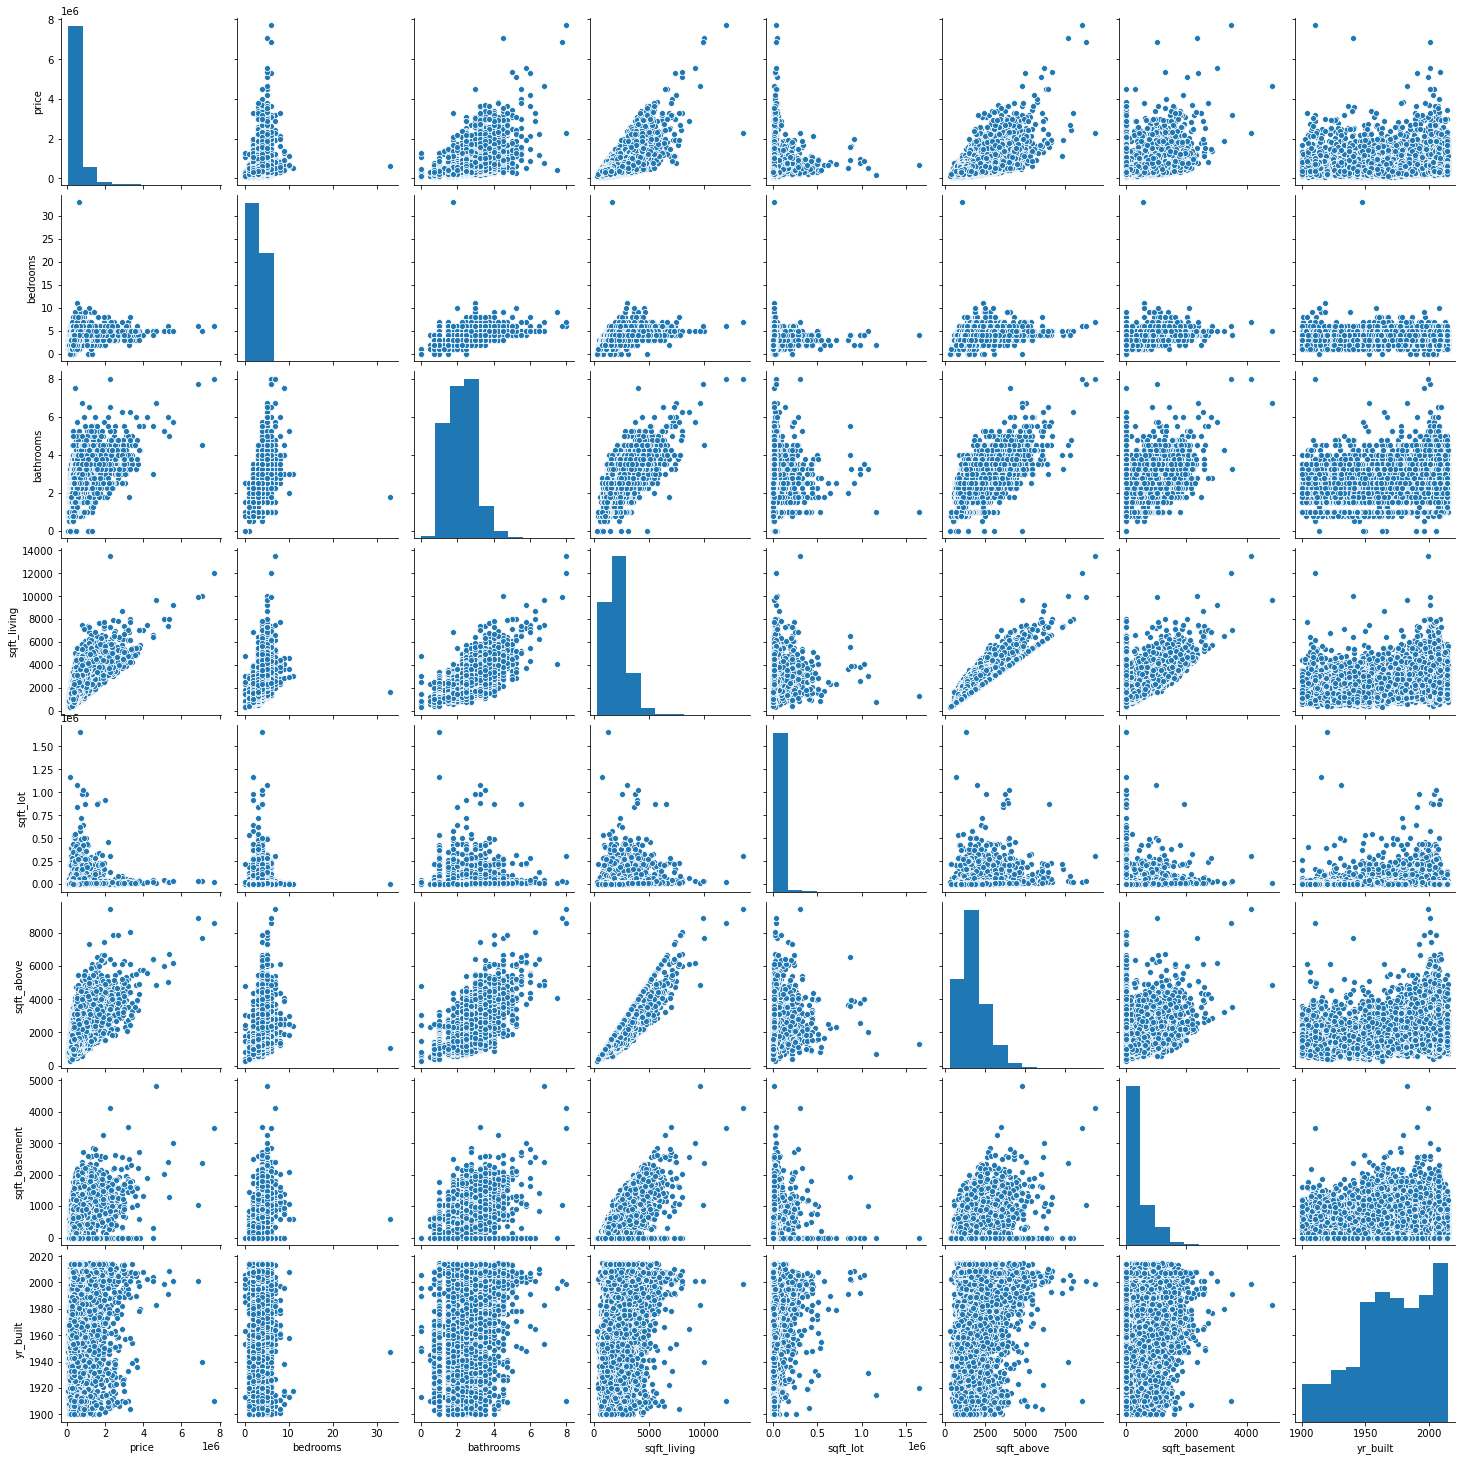

In [20]:
sns.pairplot(house_df_sample)

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [21]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [22]:
X = house_df[selected_features]

In [23]:
X

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0             3       1.00         1180      5650     1.0        1180   
1             3       2.25         2570      7242     2.0        2170   
2             2       1.00          770     10000     1.0         770   
3             4       3.00         1960      5000     1.0        1050   
4             3       2.00         1680      8080     1.0        1680   
...         ...        ...          ...       ...     ...         ...   
21608         3       2.50         1530      1131     3.0        1530   
21609         4       2.50         2310      5813     2.0        2310   
21610         2       0.75         1020      1350     2.0        1020   
21611         3       2.50         1600      2388     2.0        1600   
21612         2       0.75         1020      1076     2.0        1020   

       sqft_basement  
0                  0  
1                400  
2                  0  
3                910  
4                  0  
...              ...  
21608              0  
21609              0  
21610              0  
21611              0  
21612              0  

[21613 rows x 7 columns]

In [24]:
y = house_df['price']

In [25]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [26]:
X.shape

(21613, 7)

In [27]:
y.shape

(21613,)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [30]:
X_scaled.shape

(21613, 7)

In [31]:
scaler.data_max_

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [32]:
scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [35]:
y = y.values.reshape(-1,1)

In [36]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [37]:
y_scaled = scaler.fit_transform(y)

In [38]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

# STEP#4: TRAINING THE MODEL

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [40]:
X_train.shape

(16209, 7)

In [41]:
X_test.shape

(5404, 7)

In [50]:
import tensorflow.keras
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim = 7, activation = 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'linear'))

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               800       
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [53]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Train on 12967 samples, validate on 3242 samples
Epoch 1/100
12967/12967 [==============================] - 2s 137us/step - loss: 0.0013 - val_loss: 0.0011
Epoch 2/100
12967/12967 [==============================] - 1s 107us/step - loss: 0.0011 - val_loss: 9.8329e-04
Epoch 3/100
12967/12967 [==============================] - 1s 110us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 4/100
12967/12967 [==============================] - 1s 111us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 5/100
12967/12967 [==============================] - 1s 110us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 6/100
12967/12967 [==============================] - 1s 109us/step - loss: 0.0010 - val_loss: 0.0012
Epoch 7/100
12967/12967 [==============================] - 1s 109us/step - loss: 0.0010 - val_loss: 0.0010
Epoch 8/100
12967/12967 [==============================] - 1s 110us/step - loss: 9.9914e-04 - val_loss: 0.0010
Epoch 9/100
12967/12967 [==============================] - 1s 109us/step - loss: 0.0010

12967/12967 [==============================] - 1s 106us/step - loss: 8.9175e-04 - val_loss: 0.0011
Epoch 74/100
12967/12967 [==============================] - 1s 106us/step - loss: 8.8470e-04 - val_loss: 0.0011
Epoch 75/100
12967/12967 [==============================] - 1s 106us/step - loss: 8.8886e-04 - val_loss: 0.0011
Epoch 76/100
12967/12967 [==============================] - 1s 110us/step - loss: 8.7036e-04 - val_loss: 0.0011
Epoch 77/100
12967/12967 [==============================] - 2s 119us/step - loss: 8.7788e-04 - val_loss: 0.0010
Epoch 78/100
12967/12967 [==============================] - 1s 111us/step - loss: 8.6511e-04 - val_loss: 0.0010
Epoch 79/100
12967/12967 [==============================] - 1s 106us/step - loss: 8.8276e-04 - val_loss: 0.0010
Epoch 80/100
12967/12967 [==============================] - 1s 107us/step - loss: 9.0170e-04 - val_loss: 0.0011
Epoch 81/100
12967/12967 [==============================] - 1s 107us/step - loss: 8.7296e-04 - val_loss: 0.0010
Epoch

# STEP#5: EVALUATING THE MODEL 

In [54]:
epochs_hist.history.keys()

dict_keys(['val_loss', 'loss'])

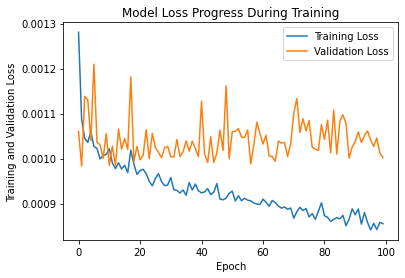

In [55]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

# One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE
# Batch_size is the Total number of training examples present in a single batch. So, you divide dataset 
# into Number of Batches or sets or parts.

In [57]:
# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

array([[204958.03]], dtype=float32)

Text(0, 0.5, 'True Values')

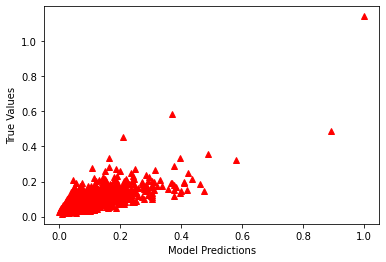

In [58]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [59]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


(0.0, 3000000.0)

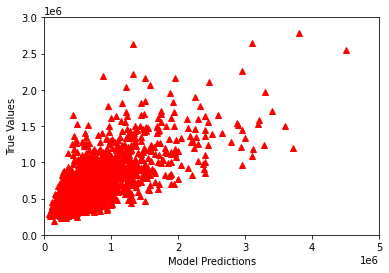

In [64]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [65]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [66]:
k

7

In [67]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 245049.655 
MSE = 60049333471.79235 
MAE = 158618.15938425242 
R2 = 0.5902366516129806 
Adjusted R2 = 0.5897050831476898


# MULTIPLE LINEAR REGRESSION 

In [68]:
X

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0             3       1.00         1180      5650     1.0        1180   
1             3       2.25         2570      7242     2.0        2170   
2             2       1.00          770     10000     1.0         770   
3             4       3.00         1960      5000     1.0        1050   
4             3       2.00         1680      8080     1.0        1680   
...         ...        ...          ...       ...     ...         ...   
21608         3       2.50         1530      1131     3.0        1530   
21609         4       2.50         2310      5813     2.0        2310   
21610         2       0.75         1020      1350     2.0        1020   
21611         3       2.50         1600      2388     2.0        1600   
21612         2       0.75         1020      1076     2.0        1020   

       sqft_basement  
0                  0  
1                400  
2                  0  
3                910  
4                  0  
...              ...  
21608              0  
21609              0  
21610              0  
21611              0  
21612              0  

[21613 rows x 7 columns]

In [69]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [71]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)
print('Linear Model Coeff (m)', regressor.coef_)
print('Linear Model Coeff (b)', regressor.intercept_)

Linear Model Coeff (m) [[-5.72610678e+04 -6.33290383e+02  2.17362959e+02 -4.33950842e-01
   1.40355567e+04  9.20374365e+01  1.25325523e+02]]
Linear Model Coeff (b) [67050.96312278]


In [72]:
y_predict = regressor.predict(X_test)


(0.0, 3000000.0)

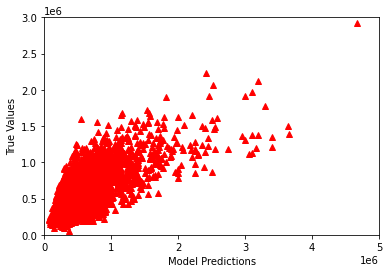

In [73]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [74]:
k = X_test.shape[1]
n = len(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 252165.981 
MSE = 63587681938.195206 
MAE = 170017.20735327294 
R2 = 0.5086030923215148 
Adjusted R2 = 0.5079656241314203


# LET'S INCREASE THE NUMBER OF FEATURES (INDEPENDANT VARIABLES)

In [75]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
y = house_df['price']

In [78]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [79]:
import tensorflow.keras
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(50, input_dim = 19, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [80]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [81]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose = 1, validation_split = 0.2)

Train on 12967 samples, validate on 3242 samples
Epoch 1/100
12967/12967 [==============================] - 1s 105us/step - loss: 0.0013 - val_loss: 7.7213e-04
Epoch 2/100
12967/12967 [==============================] - 1s 77us/step - loss: 6.1342e-04 - val_loss: 6.0292e-04
Epoch 3/100
12967/12967 [==============================] - 1s 79us/step - loss: 5.4263e-04 - val_loss: 5.4749e-04
Epoch 4/100
12967/12967 [==============================] - 1s 79us/step - loss: 5.0505e-04 - val_loss: 5.2132e-04
Epoch 5/100
12967/12967 [==============================] - 1s 80us/step - loss: 4.8536e-04 - val_loss: 5.0627e-04
Epoch 6/100
12967/12967 [==============================] - 1s 79us/step - loss: 4.5022e-04 - val_loss: 4.6760e-04
Epoch 7/100
12967/12967 [==============================] - 1s 83us/step - loss: 4.1956e-04 - val_loss: 5.5893e-04
Epoch 8/100
12967/12967 [==============================] - 1s 80us/step - loss: 4.0738e-04 - val_loss: 4.8889e-04
Epoch 9/100
12967/12967 [=================

Epoch 72/100
12967/12967 [==============================] - 1s 86us/step - loss: 2.0224e-04 - val_loss: 3.1408e-04
Epoch 73/100
12967/12967 [==============================] - 1s 77us/step - loss: 1.9257e-04 - val_loss: 2.8937e-04
Epoch 74/100
12967/12967 [==============================] - 1s 82us/step - loss: 1.9108e-04 - val_loss: 3.2778e-04
Epoch 75/100
12967/12967 [==============================] - 1s 75us/step - loss: 1.9857e-04 - val_loss: 3.3786e-04
Epoch 76/100
12967/12967 [==============================] - 1s 75us/step - loss: 1.9914e-04 - val_loss: 3.0440e-04
Epoch 77/100
12967/12967 [==============================] - 1s 78us/step - loss: 1.9200e-04 - val_loss: 2.9554e-04
Epoch 78/100
12967/12967 [==============================] - 1s 78us/step - loss: 1.8891e-04 - val_loss: 3.1167e-04
Epoch 79/100
12967/12967 [==============================] - 1s 76us/step - loss: 1.9500e-04 - val_loss: 3.4874e-04
Epoch 80/100
12967/12967 [==============================] - 1s 76us/step - loss:

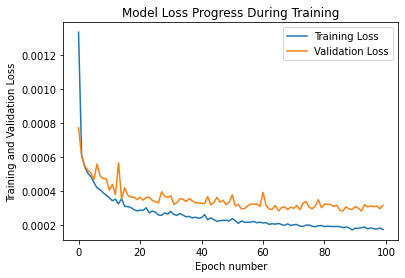

In [82]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

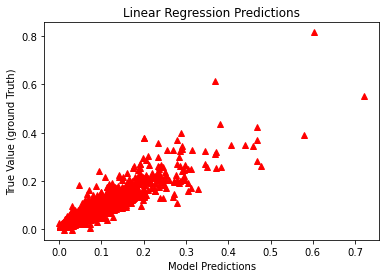

In [83]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [84]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


In [86]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_predict) /y_test ) ) * 100

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%') 


RMSE = 139388.44 
MSE = 19429137271.855682 
MAE = 78475.91766226407 
R2 = 0.8510669541537104 
Adjusted R2 = 0.8508737496835613 
Mean Absolute Percentage Error = 21.07783551874113 %


# EXCELLENT JOB! NOW YOU'VE MASTERED ANNs TO PERFORM REGRESSION TASKS!